In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import keras

Using TensorFlow backend.
/anaconda3/envs/tsa_course/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/anaconda3/envs/tsa_course/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/anaconda3/envs/tsa_course/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


## Keras intro

In [10]:
# generating data based on simple lin reg y = ma + b + c (noise)
m=2
b=3
x=np.linspace(0,50,100)
np.random.seed(101)
noise = np.random.normal(scale=4,size=len(x))

y=m*x+b+noise

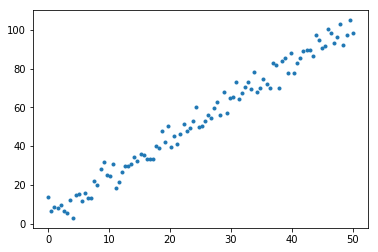

In [13]:
plt.plot(x,y,'.')

In [16]:
from keras.models import Sequential
from keras.layers import Dense

In [17]:
model = Sequential()
model.add(Dense(4,input_dim=1,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1,activation='linear'))
model.compile(loss='mse',optimizer='adam')

W0724 08:39:45.466408 4585838016 deprecation_wrapper.py:119] From /anaconda3/envs/tsa_course/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0724 08:39:45.506425 4585838016 deprecation_wrapper.py:119] From /anaconda3/envs/tsa_course/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0724 08:39:45.524835 4585838016 deprecation_wrapper.py:119] From /anaconda3/envs/tsa_course/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0724 08:39:45.570390 4585838016 deprecation_wrapper.py:119] From /anaconda3/envs/tsa_course/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 8         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.fit(x,y,epochs=200)

W0724 08:43:10.774213 4585838016 deprecation_wrapper.py:119] From /anaconda3/envs/tsa_course/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0724 08:43:10.853745 4585838016 deprecation_wrapper.py:119] From /anaconda3/envs/tsa_course/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Epoch 1/200
100/100 [==============================] - 0s 3ms/step - loss: 3628.1379
Epoch 2/200
100/100 [==============================] - 0s 49us/step - loss: 3620.4816
Epoch 3/200
100/100 [==============================] - 0s 45us/step - loss: 3612.4745
Epoch 4/200
100/100 [==============================] - 0s 56us/step - loss: 3604.3020
Epoch 5/200
100/100 [==============================] - 0s 56us/step - loss: 3596.3641
Epoch 6/200
100/100 [==============================] - 0s 48us/step - loss: 3587.4462
Epoch 7/200
100/100 [==============================] - 0s 58us/step - loss: 3578.5765
Epoch 8/200
100/100 [==============================] - 0s 49us/step - loss: 3569.7348
Epoch 9/200
100/100 [==============================] - 0s 43us/step - loss: 3560.5520
Epoch 10/200
100/100 [==============================] - 0s 50us/step - loss: 3550.8643
Epoch 11/200
100/100 [==============================] - 0s 60us/step - loss: 3541.2946
Epoch 12/200
100/100 [==============================]

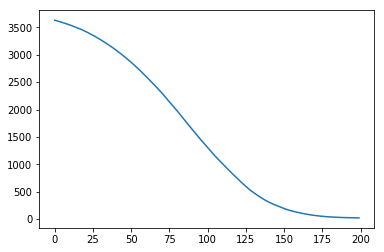

In [27]:
loss = model.history.history['loss']
epochs = range(len(loss))
plt.plot(epochs,loss)

In [28]:
model.fit(x,y,epochs=20)

Epoch 1/20
100/100 [==============================] - 0s 52us/step - loss: 21.9872
Epoch 2/20
100/100 [==============================] - 0s 45us/step - loss: 21.6116
Epoch 3/20
100/100 [==============================] - 0s 47us/step - loss: 21.2805
Epoch 4/20
100/100 [==============================] - 0s 45us/step - loss: 20.9466
Epoch 5/20
100/100 [==============================] - 0s 59us/step - loss: 20.7167
Epoch 6/20
100/100 [==============================] - 0s 78us/step - loss: 20.4703
Epoch 7/20
100/100 [==============================] - 0s 90us/step - loss: 20.2817
Epoch 8/20
100/100 [==============================] - 0s 74us/step - loss: 20.1063
Epoch 9/20
100/100 [==============================] - 0s 61us/step - loss: 19.9529
Epoch 10/20
100/100 [==============================] - 0s 77us/step - loss: 19.7902
Epoch 11/20
100/100 [==============================] - 0s 73us/step - loss: 19.6435
Epoch 12/20
100/100 [==============================] - 0s 81us/step - loss: 19.5281
E

In [29]:
x_for_predictions = np.linspace(0,50,100)
y_pred = model.predict(x_for_predictions)

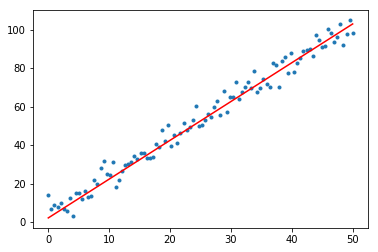

In [31]:
plt.plot(x,y,'.')
plt.plot(x_for_predictions,y_pred,'r')

In [36]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y,y_pred)

18.705421708179635